# 3장 실습

## 선형회귀의 문제점 1) 다중공선성(독립변수들간의 상관성 존재)
1. 변수 선택
    
    1) Forward
    
    2) Back
    
    3) Stepwise
    
## 선형회귀의 문제점 2) 과소적합, 과적합(독립변수 수 증가로 인한 test error 증가)
2. 정규화
    
    1) ridge regression
    ```python
    from sklearn.linear_model import Ridge
    rid=Ridge(alpha=0.1) #alpha 의미?
    model=rid.fit(x,y)
    ```

    2) lasso regression: 희소(계수에 0이 많은 정도) 모델을 만들기 위해, 변수 선택 가능

In [20]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
california=fetch_california_housing()
x=california.data
df=pd.DataFrame(x,columns=california.feature_names)
y=california.target
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [3]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model=reg.fit(x,y)
# 회귀계수 프린트
print("coef") 
print(model.coef_)
# bias/y 절편 프린트
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

coef
[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
intercept
-36.94192020718434
모델 accuracy: 0.6062326851998051


# 회귀모형의 정규화: Ridge

In [4]:
# alpha 0.1
# alpha는 람다를 뜻함. 즉, 원래 회귀식의 오차를 줄이는 것이 중요할지, 회귀계수를 크게 하지 않는 것이 중요할 지 정하는 척도
# alpha 증가할수록 회귀계수 감소
from sklearn.linear_model import Ridge
rid=Ridge(alpha=0.1) #alpha 의미?
model=rid.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

coef
[ 4.36683387e-01  9.43593980e-03 -1.07303086e-01  6.44965230e-01
 -3.97578456e-06 -3.78652421e-03 -4.21312878e-01 -4.34510858e-01]
intercept
-36.94158716336056
모델 accuracy: 0.6062326849340284


In [5]:
# alpha 0.5
from sklearn.linear_model import Ridge
rid=Ridge(alpha=0.5) #alpha 의미?
model=rid.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

coef
[ 4.36643796e-01  9.43658673e-03 -1.07227325e-01  6.44563694e-01
 -3.97336560e-06 -3.78645054e-03 -4.21306864e-01 -4.34499254e-01]
intercept
-36.940253978928126
모델 accuracy: 0.6062326785630646


In [6]:
# alpha 1
from sklearn.linear_model import Ridge
rid=Ridge(alpha=1) #alpha 의미?
model=rid.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

# alpha 2
from sklearn.linear_model import Ridge
rid=Ridge(alpha=2) #alpha 의미?
model=rid.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

# alpha가 증가할수록 편차가 감소.

coef
[ 4.36594382e-01  9.43739513e-03 -1.07132761e-01  6.44062485e-01
 -3.97034295e-06 -3.78635869e-03 -4.21299306e-01 -4.34484717e-01]
intercept
-36.93858523232896
모델 accuracy: 0.6062326586911465
coef
[ 4.36495800e-01  9.43901106e-03 -1.06944092e-01  6.43062429e-01
 -3.96430115e-06 -3.78617577e-03 -4.21284056e-01 -4.34455530e-01]
intercept
-36.93524021400929
모델 accuracy: 0.6062325794705161


# 회귀모형의 정규화: Lasso

In [7]:
# alpha가 커지면 커질수록 0을 계수로 가지는 계수가 많아짐
from sklearn.linear_model import Lasso
las=Lasso(alpha=0.1) #alpha 의미?
model=las.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

from sklearn.linear_model import Lasso
las=Lasso(alpha=0.5) #alpha 의미?
model=las.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

from sklearn.linear_model import Lasso
las=Lasso(alpha=1) #alpha 의미?
model=las.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

from sklearn.linear_model import Lasso
las=Lasso(alpha=2) #alpha 의미?
model=las.fit(x,y)
print("coef")
print(model.coef_)
print("intercept")
print(model.intercept_)
print("모델 accuracy:", model.score(x,y))

coef
[ 3.90582557e-01  1.50821512e-02 -0.00000000e+00  0.00000000e+00
  1.75019561e-05 -3.32253135e-03 -1.14214430e-01 -9.92250689e-02]
intercept
-7.684589184737931
모델 accuracy: 0.5452665703368436
coef
[ 2.88854841e-01  1.20314561e-02  0.00000000e+00 -0.00000000e+00
  1.17610340e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
intercept
0.5891563081837055
모델 accuracy: 0.4537830603843076
coef
[ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
intercept
1.3480413673416143
모델 accuracy: 0.285262314491983
coef
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -2.35579621e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
intercept
2.102139496162415
모델 accuracy: 0.0006052641882725585


# 회귀모형의 변수 선택: Forward Selection

In [12]:
california=fetch_california_housing()
x=california.data
df=pd.DataFrame(x,columns=california.feature_names)
y=california.target
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [13]:
import statsmodels.api as sm

def forward_selection(data,target,cutoff=0.05):
# cutoff: 변수를 추가하기 전과 후가 같다가 귀무가설, 만약 기각역이 커지면 커질수록 둘은 다르다고 판단되어질 확률이 높다는 것이다.
# 기각역이 증가했기 때문! 그러므로 cutoff value가 작으면 매우 빡빡한 검증을 하고 있는 것. 둘이 다르다고 판단되어야 변수를 추가할 수 있기 때문.
    initial_features = data.columns.tolist()# 초기값(모든 독립변수 포함)
    best_features = []# 높은 점수를 띄는 변수를 추가할 리스트
    while(len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        # new_pval이라는 시리즈의 인덱스를 remaining features 로 두기
        # 남은 변수들을 하나씩 추가하여 각각의 p value가 기각역(차이가 존재한다)에 속하면 best 변수에 추가)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
            # new_column은 remaining feature에서 나온 값. new_column을 인덱스로 작고 있는 값에 pvalue 채워넣기
        min_p_value = new_pval.min()
        # pvalue중 가장 작은 값. 즉 가장 영향을 많이 준다고 생각하는 값 고르기
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
        

In [14]:
forwarddata=forward_selection(df,y,0.01)
print(forwarddata)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


# Forward selection 산포도:

포함되지 않은 변수와 종속변수와의 관계.

경향성을 띄는 변수도 존재. 그 경우에는 해당 변수가 주는 영향을 이미 다른 변수가 주었기 때문에 제외되었음을 알면 됨. 즉, 다중공선성 문제 해결

No handles with labels found to put in legend.


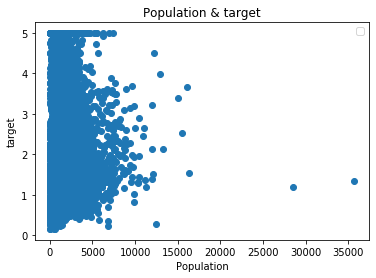

In [21]:
i=4
plt.title(california.feature_names[i]+' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(df[california.feature_names[i]],y)
plt.legend()
plt.show()


# 회귀모형의 변수 선택 모델: Backward Selection

In [25]:
def backward_elimination(data, target, cutoff= 0.05):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= cutoff):
            excluded_feature=p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features
backwarddata=backward_elimination(df,y,0.01)
print(backwarddata)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


# 회귀모형의 변수 선택 모델: Stepwise selection

In [26]:
def stepwise_selection(data,target,cutoff):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
            while(len(best_features) > 0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= cutoff):
                    excluded_feature=p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features
stepwisedata=stepwise_selection(df,y,0.01)
print(stepwisedata)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']
